In [15]:
from fitter import Fitter, get_common_distributions
import pandas as pd
import random
import seaborn as sns

In [18]:
m = get_common_distributions()

m

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

# Gender

Patient gender can be calculated using a Bernoulli Distribution 

In [9]:
def gender(source):
    
    if source=='Emergency Medical':
    
        if random.random()<0.496718828874:
            return 'm'
        else:
            return 'f'
        
    elif source=='Emergency Surgical':
        
        if random.random()<0.449111470113:
            return 'm'
        else:
            return 'f'

    elif source=='Elective':
        
        if random.random()<0.537662337662:
            return 'm'
        else:
            return 'f'     
        
gender('Elective')

'f'

In [2]:
%%sql
SELECT
    Cast (AgeOnAdmission as int) age_male,
    Case When em_el_dc = 'Elect' Then 'Elective' when em_el_dc = 'Emerg' and ActivityTreatmentfunctioncode in (120,140,107,103,104,110,106,144,991,100,101,655,108,130,502,503) Then 'Surgical Emergency' Else 'Medical Emergency' End type


FROM [CDS_APC].[dbo].[tblAPCCurrent]

Where SourceSys = 'TauntonandSomerset'
  and (WellBabyFlag = 0 or WellBabyFlagDerivied= 0)
  and EpisodeNumber = 1
  and SpellStartDate between dateadd(day, -29, getdate()) and dateadd(day, -1, getdate())
  and ActivityTreatmentfunctioncode in (120, 140, 450, 107, 330, 103, 301, 104, 110, 360, 106, 144, 991, 100, 101, 108, 306, 130, 502, 503, 180, 320, 401, 330, 307, 302, 301, 300, 430, 400, 314, 340, 410) -- Medical & Surgical
  and em_el_dc <> 'Dcase'
  and SexofPatientsCode1 = 1

Order by age_male

,age_male,type
0,0,Surgical Emergency
1,0,Surgical Emergency
2,1,Medical Emergency
3,1,Surgical Emergency
4,3,Surgical Emergency
...,...,...
1752,98,Medical Emergency
1753,98,Medical Emergency
1754,99,Elective
1755,99,Medical Emergency


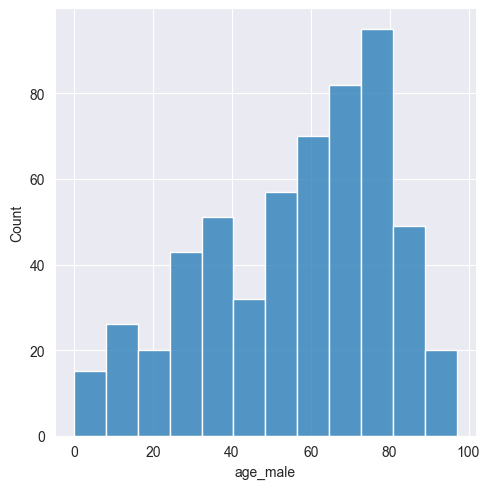

In [9]:
sns.displot(age, x=age[age['type']=='Surgical Emergency']['age_male'], kde=True)

In [13]:
f = Fitter(age[age['type']=='Elective']['age_male'])

f.fit()

Fitting 110 distributions:  98%|█████████▊| 108/110 [01:01<00:02,  1.20s/it]C:\ProgramData\miniconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED vonmises distribution (taking more than 30 seconds)
Fitting 110 distributions: 100%|██████████| 110/110 [01:14<00:00,  1.47it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dgamma,0.006444,1111.082352,-2143.488760,inf,0.078059,0.150335
burr12,0.007526,1080.898737,-2105.848868,inf,0.073697,0.198551
powerlognorm,0.007530,1079.039919,-2105.734896,inf,0.056482,0.502662
powernorm,0.007541,1060.381289,-2110.779895,inf,0.062731,0.370896
johnsonsb,0.007542,1062.956431,-2105.399695,inf,0.062759,0.370347


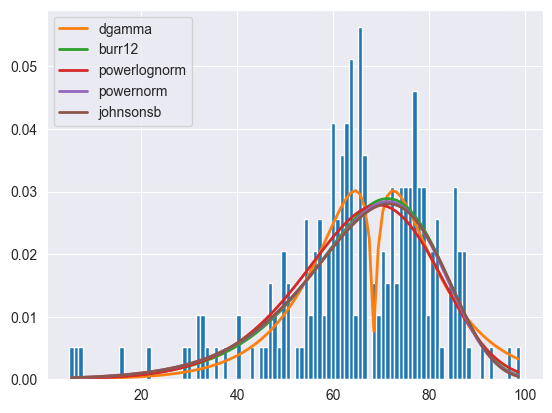

In [14]:
f.summary()




In [1]:
import numpy as np



In [16]:
age = np.random.normal(scale=18,size=1)

print(age)

[-4.99653519]


In [50]:
def fetch_distributions(name, **kwargs):
    """
    
    :param name: Name of Distribution
    :param kwargs: the keywords required to populate distributions https://numpy.org/doc/1.16/reference/routines.random.html
    :return: List
    """
    
    if name == 'exponential':
        try:
            return sorted([int(x) for x in np.random.exponential(size=kwargs['size'], scale=kwargs['scale'])])
        except:
            raise Exception("Missing Key Words, size and scale required")


In [62]:

import plotly.graph_objects as go

def count_numbers(lst):
    counts = {}
    for num in lst:
        if num in counts:
            counts[num] += 1
        else:
            counts[num] = 1
            
    keys = list(counts.keys())
    values = list(counts.values())

    return keys, values


def create_distribution_graph(data):
    
    keys, counts = count_numbers(data)
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=keys, 
                             y=counts, 
                             line_shape='spline')
                  )
    
    fig.update_layout(margin=dict(t=1, b=10, r=10, l=10), 
                      template='seaborn', 
                      yaxis=dict(visible=False))

    
    return fig

create_distribution_graph(fetch_distributions(name='exponential', 
                                              size=10_000, 
                                              scale=3.0))


    

In [5]:
m = {'beta': ['a','b'],
'binomial': ['n','p'],
'chisquare': ['df'],
'dirichlet': ['alpha'],
'exponential': ['scale'],
'gamma': ['shape', 'scale'],
'geometric': ['p'],
'gumbel': ['loc','scale'],
'hypergeometric': ['ngood','nbad','nsample'],
'laplace': ['loc','scale'],
'logistic': ['loc','scale'],
'lognormal': ['mean', 'sigma'],
'logseries': ['p'],
'multinomial': ['n','pvals'],
'multivariate_normal': ['mean','cov'],
'negative_binomial': ['n','p'],
'noncentral_chisquare': ['df','nonc'],
'noncentral_f': ['dfnum','dfden','nonc'],
'normal': ['loc','scale'],
'pareto': ['a'],
'poisson': ['lam'],
'power': ['a'],
'rayleigh': ['scale'],
'triangular': ['left','mode','right'],
'uniform': ['low', 'high'],
'vonmises': ['mu','kappa'],
'wald': ['mean','scale'],
'weibull': ['a'],
'zipf': ['a']}


m['weibull']


['a']